In [1]:
import sys
import numpy as np
import pylab as pl
import pandas as pd
from matplotlib import colors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 20})

(2000, 6)


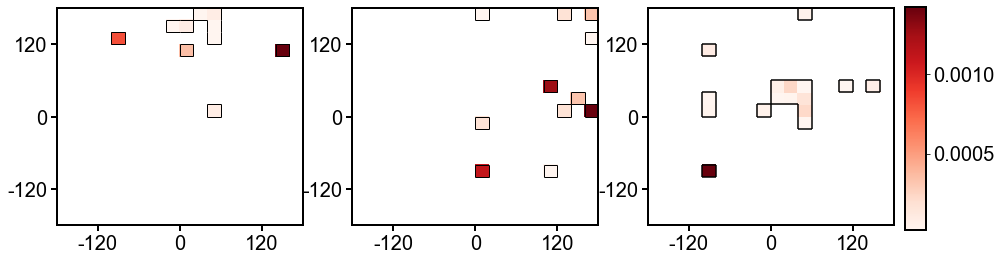

In [61]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble

binwidth = 20

ABG = pd.read_csv("data/ES1-synG34-Titration-ABG.csv", header=None, sep=",")
ABG.columns = ["alpha", "beta", "gamma", "conf", "rmsd1", "rmsd2"]
sas_indices = np.array(np.genfromtxt("data/ES1-G34syn-Titrations-pES_0p5-AllIndices.txt"), dtype=int)

ABG = ABG.iloc[sas_indices, :]
print(ABG.shape)
fig1 = pl.figure(1,figsize=(15,4))

ax1 = fig1.add_subplot(1,3,1)
H1, x, y = np.histogram2d(ABG.alpha.tolist(), ABG.beta.tolist(), bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H1 = np.ma.masked_where(H1==0,H1)
H1 = np.rot90(H1)
H1 = np.flipud(H1)



h1 = np.array([[1 if H1[i][j] != "--" else 0 for i in range(len(H1))] for j in range(len(H1))]).T
h11 = np.array([[1 if h1[i][j] == 0 and h1[i][j+1] == 1 else 0 for i in range(len(h1))] for j in range(len(h1)-1)]).T
h12 = np.array([[1 if h1[i][j] == 0 and h1[i+1][j] == 1 else 0 for i in range(len(h1)-1)] for j in range(len(h1))]).T
h13 = np.array([[1 if h1[i][j] == 1 and h1[i][j+1] == 0 else 0 for i in range(len(h1))] for j in range(len(h1)-1)]).T
h14 = np.array([[1 if h1[i][j] == 1 and h1[i+1][j] == 0 else 0 for i in range(len(h1)-1)] for j in range(len(h1))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h11)):
    for j in range(len(h11[0])):
        if h11[i,j] == 1:
            ax1.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1)
for i in range(len(h12)):
    for j in range(len(h12[0])):
        if h12[i,j] == 1:
            ax1.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1)
for i in range(len(h13)):
    for j in range(len(h13[0])):
        if h13[i,j] == 1:
            ax1.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1)
for i in range(len(h14)):
    for j in range(len(h14[0])):
        if h14[i,j] == 1:
            ax1.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1)


pcm = ax1.pcolor(x,y,H1,cmap='Reds')
#ax1.set_xlabel('alpha', fontsize=16)
#ax1.set_ylabel('beta', fontsize=16)
ax1.set_xticks(np.arange(-120,121,120))
ax1.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax1.set_xticklabels(np.arange(-120,121,120))
ax1.set_yticklabels(np.arange(-120,121,120))
ax1.set_xlim(-180,180)
ax1.set_ylim(-180,180)

ax2 = fig1.add_subplot(1,3,2)
H2, x, y = np.histogram2d(ABG.beta.tolist(), ABG.gamma.tolist(), bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H2 = np.ma.masked_where(H2==0,H2)
H2 = np.rot90(H2)
H2 = np.flipud(H2)


h2 = np.array([[1 if H2[i][j] != "--" else 0 for i in range(len(H2))] for j in range(len(H2))]).T
h21 = np.array([[1 if h2[i][j] == 0 and h2[i][j+1] == 1 else 0 for i in range(len(h2))] for j in range(len(h2)-1)]).T
h22 = np.array([[1 if h2[i][j] == 0 and h2[i+1][j] == 1 else 0 for i in range(len(h2)-1)] for j in range(len(h2))]).T
h23 = np.array([[1 if h2[i][j] == 1 and h2[i][j+1] == 0 else 0 for i in range(len(h2))] for j in range(len(h2)-1)]).T
h24 = np.array([[1 if h2[i][j] == 1 and h2[i+1][j] == 0 else 0 for i in range(len(h2)-1)] for j in range(len(h2))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h21)):
    for j in range(len(h21[0])):
        if h21[i,j] == 1:
            ax2.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1)
for i in range(len(h22)):
    for j in range(len(h22[0])):
        if h22[i,j] == 1:
            ax2.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1)
for i in range(len(h23)):
    for j in range(len(h23[0])):
        if h23[i,j] == 1:
            ax2.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1)
for i in range(len(h24)):
    for j in range(len(h24[0])):
        if h24[i,j] == 1:
            ax2.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1)


pcm = ax2.pcolor(x,y,H2,cmap='Reds')
#ax2.set_xlabel('beta', fontsize=16)
#ax2.set_ylabel('gamma', fontsize=16)
ax2.set_xticks(np.arange(-120,121,120))
ax2.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax2.set_xticklabels(np.arange(-120,121,120))
ax2.set_yticklabels(np.arange(-120,121,120))
ax2.set_xlim(-180,180)
ax2.set_ylim(-180,180)


ax3 = fig1.add_subplot(1,3,3)
H3, x, y = np.histogram2d(ABG.alpha.tolist(), ABG.gamma.tolist(), bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H3 = np.ma.masked_where(H3==0,H3)
H3 = np.rot90(H3)
H3 = np.flipud(H3)


h3 = np.array([[1 if H3[i][j] != "--" else 0 for i in range(len(H3))] for j in range(len(H3))]).T
h31 = np.array([[1 if h3[i][j] == 0 and h3[i][j+1] == 1 else 0 for i in range(len(h3))] for j in range(len(h3)-1)]).T
h32 = np.array([[1 if h3[i][j] == 0 and h3[i+1][j] == 1 else 0 for i in range(len(h3)-1)] for j in range(len(h3))]).T
h33 = np.array([[1 if h3[i][j] == 1 and h3[i][j+1] == 0 else 0 for i in range(len(h3))] for j in range(len(h3)-1)]).T
h34 = np.array([[1 if h3[i][j] == 1 and h3[i+1][j] == 0 else 0 for i in range(len(h3)-1)] for j in range(len(h3))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h31)):
    for j in range(len(h31[0])):
        if h31[i,j] == 1:
            ax3.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h32)):
    for j in range(len(h32[0])):
        if h32[i,j] == 1:
            ax3.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h33)):
    for j in range(len(h33[0])):
        if h33[i,j] == 1:
            ax3.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h34)):
    for j in range(len(h34[0])):
        if h34[i,j] == 1:
            ax3.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax3.pcolor(x,y,H3,cmap='Reds')
ax3.set_xticks(np.arange(-120,121,120))
ax3.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax3.set_xticklabels(np.arange(-120,121,120))
ax3.set_yticklabels(np.arange(-120,121,120))
ax3.set_xlim(-180,180)
ax3.set_ylim(-180,180)

fig1.subplots_adjust(right=0.9)
cbaxes = fig1.add_axes([0.91,0.108,0.02,0.776])
clb = pl.colorbar(pcm, cax=cbaxes)
ax1.tick_params(width=2,length=6)
ax2.tick_params(width=2,length=6)
ax3.tick_params(width=2,length=6)

plt.savefig("plots/wtTAR-ABG-2D.pdf")


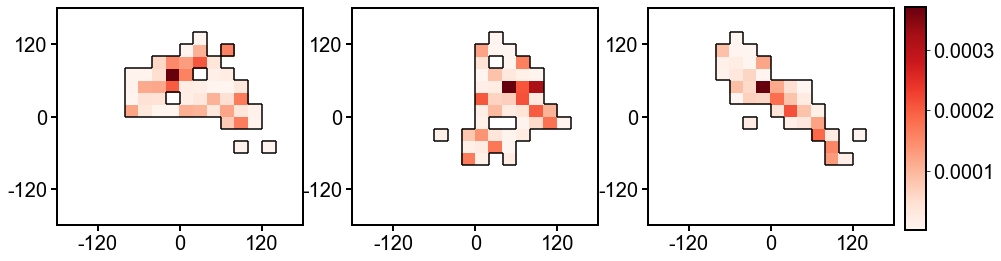

In [121]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble

binwidth = 20

ABG = pd.read_csv("data/subFARFAR2_abg.txt", header=None, delim_whitespace=True)
ABG.columns = ["alpha", "beta", "gamma", "rmsd1", "rmsd2"]
sas_indices = np.reshape(np.array(np.genfromtxt("data/sas_subfarfar2_20X100.tab")[:, 2:], dtype=int), (2000,))

ABG = ABG.iloc[sas_indices, :]

#print(ABG)

fig1 = pl.figure(1,figsize=(15,4))

ax1 = fig1.add_subplot(1,3,1)
H1, x, y = np.histogram2d(ABG.alpha.values, ABG.beta.values, bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H1 = np.ma.masked_where(H1==0,H1)
H1 = np.rot90(H1)
H1 = np.flipud(H1)




h1 = np.array([[1 if H1[i][j] != "--" else 0 for i in range(len(H1))] for j in range(len(H1))]).T
h11 = np.array([[1 if h1[i][j] == 0 and h1[i][j+1] == 1 else 0 for i in range(len(h1))] for j in range(len(h1)-1)]).T
h12 = np.array([[1 if h1[i][j] == 0 and h1[i+1][j] == 1 else 0 for i in range(len(h1)-1)] for j in range(len(h1))]).T
h13 = np.array([[1 if h1[i][j] == 1 and h1[i][j+1] == 0 else 0 for i in range(len(h1))] for j in range(len(h1)-1)]).T
h14 = np.array([[1 if h1[i][j] == 1 and h1[i+1][j] == 0 else 0 for i in range(len(h1)-1)] for j in range(len(h1))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h11)):
    for j in range(len(h11[0])):
        if h11[i,j] == 1:
            ax1.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h12)):
    for j in range(len(h12[0])):
        if h12[i,j] == 1:
            ax1.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h13)):
    for j in range(len(h13[0])):
        if h13[i,j] == 1:
            ax1.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h14)):
    for j in range(len(h14[0])):
        if h14[i,j] == 1:
            ax1.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax1.pcolor(x,y,H1,cmap='Reds')
#ax1.set_xlabel('alpha', fontsize=16)
#ax1.set_ylabel('beta', fontsize=16)
ax1.set_xticks(np.arange(-120,121,120))
ax1.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax1.set_xticklabels(np.arange(-120,121,120))
ax1.set_yticklabels(np.arange(-120,121,120))
ax1.set_xlim(-180,180)
ax1.set_ylim(-180,180)

ax2 = fig1.add_subplot(1,3,2)
H2, x, y = np.histogram2d(ABG.beta.values, ABG.gamma.values, bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H2 = np.ma.masked_where(H2==0,H2)
H2 = np.rot90(H2)
H2 = np.flipud(H2)


h2 = np.array([[1 if H2[i][j] != "--" else 0 for i in range(len(H2))] for j in range(len(H2))]).T
h21 = np.array([[1 if h2[i][j] == 0 and h2[i][j+1] == 1 else 0 for i in range(len(h2))] for j in range(len(h2)-1)]).T
h22 = np.array([[1 if h2[i][j] == 0 and h2[i+1][j] == 1 else 0 for i in range(len(h2)-1)] for j in range(len(h2))]).T
h23 = np.array([[1 if h2[i][j] == 1 and h2[i][j+1] == 0 else 0 for i in range(len(h2))] for j in range(len(h2)-1)]).T
h24 = np.array([[1 if h2[i][j] == 1 and h2[i+1][j] == 0 else 0 for i in range(len(h2)-1)] for j in range(len(h2))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h21)):
    for j in range(len(h21[0])):
        if h21[i,j] == 1:
            ax2.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h22)):
    for j in range(len(h22[0])):
        if h22[i,j] == 1:
            ax2.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h23)):
    for j in range(len(h23[0])):
        if h23[i,j] == 1:
            ax2.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h24)):
    for j in range(len(h24[0])):
        if h24[i,j] == 1:
            ax2.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax2.pcolor(x,y,H2,cmap='Reds')
#ax2.set_xlabel('beta', fontsize=16)
#ax2.set_ylabel('gamma', fontsize=16)
ax2.set_xticks(np.arange(-120,121,120))
ax2.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax2.set_xticklabels(np.arange(-120,121,120))
ax2.set_yticklabels(np.arange(-120,121,120))
ax2.set_xlim(-180,180)
ax2.set_ylim(-180,180)


ax3 = fig1.add_subplot(1,3,3)
H3, x, y = np.histogram2d(ABG.alpha.values, ABG.gamma.values, bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H3 = np.ma.masked_where(H3==0,H3)
H3 = np.rot90(H3)
H3 = np.flipud(H3)


h3 = np.array([[1 if H3[i][j] != "--" else 0 for i in range(len(H3))] for j in range(len(H3))]).T
h31 = np.array([[1 if h3[i][j] == 0 and h3[i][j+1] == 1 else 0 for i in range(len(h3))] for j in range(len(h3)-1)]).T
h32 = np.array([[1 if h3[i][j] == 0 and h3[i+1][j] == 1 else 0 for i in range(len(h3)-1)] for j in range(len(h3))]).T
h33 = np.array([[1 if h3[i][j] == 1 and h3[i][j+1] == 0 else 0 for i in range(len(h3))] for j in range(len(h3)-1)]).T
h34 = np.array([[1 if h3[i][j] == 1 and h3[i+1][j] == 0 else 0 for i in range(len(h3)-1)] for j in range(len(h3))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h31)):
    for j in range(len(h31[0])):
        if h31[i,j] == 1:
            ax3.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h32)):
    for j in range(len(h32[0])):
        if h32[i,j] == 1:
            ax3.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h33)):
    for j in range(len(h33[0])):
        if h33[i,j] == 1:
            ax3.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h34)):
    for j in range(len(h34[0])):
        if h34[i,j] == 1:
            ax3.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax3.pcolor(x,y,H3,cmap='Reds')
ax3.set_xticks(np.arange(-120,121,120))
ax3.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax3.set_xticklabels(np.arange(-120,121,120))
ax3.set_yticklabels(np.arange(-120,121,120))
ax3.set_xlim(-180,180)
ax3.set_ylim(-180,180)

fig1.subplots_adjust(right=0.9)
cbaxes = fig1.add_axes([0.91,0.108,0.02,0.776])
clb = pl.colorbar(pcm, cax=cbaxes)
ax1.tick_params(width=2,length=6)
ax2.tick_params(width=2,length=6)
ax3.tick_params(width=2,length=6)

plt.savefig("plots/mtTAR-ABG-2D.pdf")


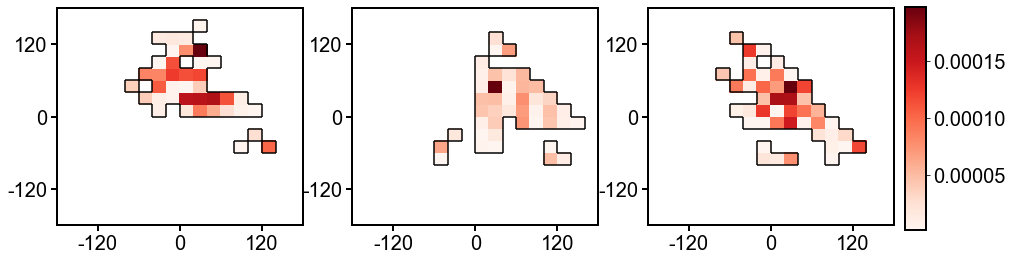

In [122]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble (GS only)

binwidth = 20

ABG = pd.read_csv("data/ES1-synG34-Titration-ABG.csv", sep=",")
sas_indices = np.genfromtxt("data/ES1-G34syn-Titrations-pES_0p5-AllIndices.txt")
gs_indices = sas_indices[sas_indices < 5000]
ABG = ABG.iloc[sas_indices, :]

#print(ABG)

fig1 = pl.figure(1,figsize=(15,4))

ax1 = fig1.add_subplot(1,3,1)
H1, x, y = np.histogram2d(ABG.alpha.values, ABG.beta.values, bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H1 = np.ma.masked_where(H1==0,H1)
H1 = np.rot90(H1)
H1 = np.flipud(H1)




h1 = np.array([[1 if H1[i][j] != "--" else 0 for i in range(len(H1))] for j in range(len(H1))]).T
h11 = np.array([[1 if h1[i][j] == 0 and h1[i][j+1] == 1 else 0 for i in range(len(h1))] for j in range(len(h1)-1)]).T
h12 = np.array([[1 if h1[i][j] == 0 and h1[i+1][j] == 1 else 0 for i in range(len(h1)-1)] for j in range(len(h1))]).T
h13 = np.array([[1 if h1[i][j] == 1 and h1[i][j+1] == 0 else 0 for i in range(len(h1))] for j in range(len(h1)-1)]).T
h14 = np.array([[1 if h1[i][j] == 1 and h1[i+1][j] == 0 else 0 for i in range(len(h1)-1)] for j in range(len(h1))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h11)):
    for j in range(len(h11[0])):
        if h11[i,j] == 1:
            ax1.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h12)):
    for j in range(len(h12[0])):
        if h12[i,j] == 1:
            ax1.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h13)):
    for j in range(len(h13[0])):
        if h13[i,j] == 1:
            ax1.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h14)):
    for j in range(len(h14[0])):
        if h14[i,j] == 1:
            ax1.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax1.pcolor(x,y,H1,cmap='Reds')
#ax1.set_xlabel('alpha', fontsize=16)
#ax1.set_ylabel('beta', fontsize=16)
ax1.set_xticks(np.arange(-120,121,120))
ax1.set_yticks(np.arange(-120,121,120))
ax1.set_xticklabels(np.arange(-120,121,120))
ax1.set_yticklabels(np.arange(-120,121,120))
ax1.set_xlim(-180,180)
ax1.set_ylim(-180,180)


ax2 = fig1.add_subplot(1,3,2)
H2, x, y = np.histogram2d(ABG.beta.values, ABG.gamma.values, bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H2 = np.ma.masked_where(H2==0,H2)
H2 = np.rot90(H2)
H2 = np.flipud(H2)


h2 = np.array([[1 if H2[i][j] != "--" else 0 for i in range(len(H2))] for j in range(len(H2))]).T
h21 = np.array([[1 if h2[i][j] == 0 and h2[i][j+1] == 1 else 0 for i in range(len(h2))] for j in range(len(h2)-1)]).T
h22 = np.array([[1 if h2[i][j] == 0 and h2[i+1][j] == 1 else 0 for i in range(len(h2)-1)] for j in range(len(h2))]).T
h23 = np.array([[1 if h2[i][j] == 1 and h2[i][j+1] == 0 else 0 for i in range(len(h2))] for j in range(len(h2)-1)]).T
h24 = np.array([[1 if h2[i][j] == 1 and h2[i+1][j] == 0 else 0 for i in range(len(h2)-1)] for j in range(len(h2))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h21)):
    for j in range(len(h21[0])):
        if h21[i,j] == 1:
            ax2.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h22)):
    for j in range(len(h22[0])):
        if h22[i,j] == 1:
            ax2.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h23)):
    for j in range(len(h23[0])):
        if h23[i,j] == 1:
            ax2.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h24)):
    for j in range(len(h24[0])):
        if h24[i,j] == 1:
            ax2.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax2.pcolor(x,y,H2,cmap='Reds')
#ax2.set_xlabel('beta', fontsize=16)
#ax2.set_ylabel('gamma', fontsize=16)
ax2.set_xticks(np.arange(-120,121,120))
ax2.set_yticks(np.arange(-120,121, 120))
ax2.set_xticklabels(np.arange(-120,121,120))
ax2.set_yticklabels(np.arange(-120,121,120))
ax2.set_xlim(-180,180)
ax2.set_ylim(-180,180)


ax3 = fig1.add_subplot(1,3,3)
H3, x, y = np.histogram2d(ABG.alpha.values, ABG.gamma.values, bins=np.arange(-180,181,binwidth),normed=1)  #Initial distribution
H3 = np.ma.masked_where(H3==0,H3)
H3 = np.rot90(H3)
H3 = np.flipud(H3)


h3 = np.array([[1 if H3[i][j] != "--" else 0 for i in range(len(H3))] for j in range(len(H3))]).T
h31 = np.array([[1 if h3[i][j] == 0 and h3[i][j+1] == 1 else 0 for i in range(len(h3))] for j in range(len(h3)-1)]).T
h32 = np.array([[1 if h3[i][j] == 0 and h3[i+1][j] == 1 else 0 for i in range(len(h3)-1)] for j in range(len(h3))]).T
h33 = np.array([[1 if h3[i][j] == 1 and h3[i][j+1] == 0 else 0 for i in range(len(h3))] for j in range(len(h3)-1)]).T
h34 = np.array([[1 if h3[i][j] == 1 and h3[i+1][j] == 0 else 0 for i in range(len(h3)-1)] for j in range(len(h3))]).T
x_edge = x[1:]
y_edge = y[1:]
for i in range(len(h31)):
    for j in range(len(h31[0])):
        if h31[i,j] == 1:
            ax3.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h32)):
    for j in range(len(h32[0])):
        if h32[i,j] == 1:
            ax3.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)
for i in range(len(h33)):
    for j in range(len(h33[0])):
        if h33[i,j] == 1:
            ax3.vlines(x_edge[j],y[i],y[i+1],color='black',linewidth=1.5)
for i in range(len(h34)):
    for j in range(len(h34[0])):
        if h34[i,j] == 1:
            ax3.hlines(y_edge[i],x[j],x[j+1],color='black',linewidth=1.5)


pcm = ax3.pcolor(x,y,H3,cmap='Reds')
ax3.set_xticks(np.arange(-120,121,120))
ax3.set_yticks(np.arange(-120,121,120))
#ax3.set_xlabel('alpha', fontsize=16)
#ax3.set_ylabel('gamma', fontsize=16)
ax3.set_xticklabels(np.arange(-120,121,120))
ax3.set_yticklabels(np.arange(-120,121,120))
ax3.set_xlim(-180,180)
ax3.set_ylim(-180,180)

fig1.subplots_adjust(right=0.9)
cbaxes = fig1.add_axes([0.91,0.108,0.02,0.776])
clb = pl.colorbar(pcm, cax=cbaxes)
ax1.tick_params(width=2,length=6)
ax2.tick_params(width=2,length=6)
ax3.tick_params(width=2,length=6)

plt.savefig("plots/wtTAR_ABG_2D.pdf")


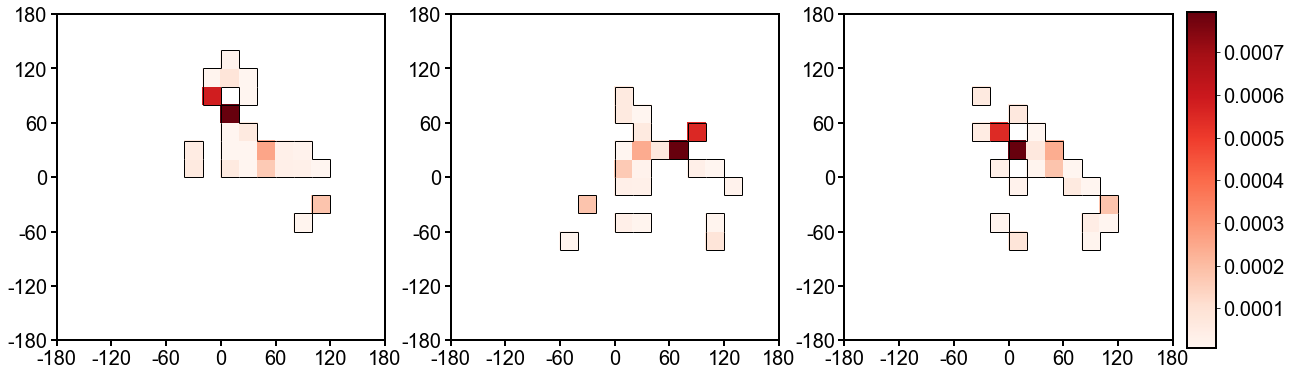

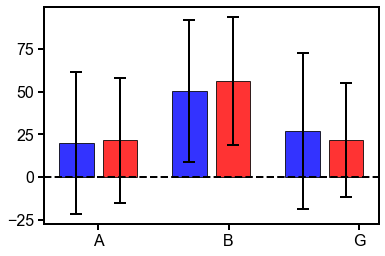

In [123]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble (ES only)
import seaborn as sns
fig, ax = pl.subplots(1,figsize=(6,4))
binwidth = 20


ABG = pd.read_csv("data/ES1-synG34-Titration-ABG.csv", sep=",")
sas_indices = np.genfromtxt("data/ES1-G34syn-Titrations-pES_0p5-AllIndices.txt")
es_indices = sas_indices[sas_indices >= 5000]

A_ES = ABG.iloc[es_indices, 0]
A_GS = ABG.iloc[gs_indices, 0]
A_ES_mean = np.mean(A_ES)
A_ES_std = np.std(A_ES)
A_GS_mean = np.mean(A_GS)
A_GS_std = np.std(A_GS)

B_ES = ABG.iloc[es_indices, 1]
B_GS = ABG.iloc[gs_indices, 1]
B_ES_mean = np.mean(B_ES)
B_ES_std = np.std(B_ES)
B_GS_mean = np.mean(B_GS)
B_GS_std = np.std(B_GS)

G_ES = ABG.iloc[es_indices, 2]
G_GS = ABG.iloc[gs_indices, 2]
G_ES_mean = np.mean(G_ES)
G_ES_std = np.std(G_ES)
G_GS_mean = np.mean(G_GS)
G_GS_std = np.std(G_GS)

positions = [1.2+0.05, 1.8-0.05, 
             3.2+0.05-0.5 -0.2, 3.8-0.5-0.05-0.2,
             5.2-1+0.05-0.4, 5.8-1-0.05-0.4]
heights = [A_GS_mean, A_ES_mean, B_GS_mean, B_ES_mean, G_GS_mean, G_ES_mean]
errors = [A_GS_std, A_ES_std, B_GS_std, B_ES_std, G_GS_std, G_ES_std]
colors = ['blue', 'red']*3
plt.bar(positions, heights, yerr=errors, width=0.4, color=colors, alpha=0.8, 
        capsize=6, error_kw = {'elinewidth':2, 'capthick':2}, edgecolor="black")
plt.gca().axhline(y=0, color="k", ls="--", lw=2)
ax = plt.gca()
xtick_labs = ["A", "B", "G"]
xtick_pos = [(1.2+1.8)/2, (3.2-0.5+3.8-0.5)/2, (5.2-1+5.8-1)/2 ]
ax.set_xticklabels(labels=xtick_labs, fontsize=16)
ax.set_xticks(ticks=xtick_pos)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(width=2,length=6)
plt.savefig("plots/ABG_ES_vs_GS.pdf")

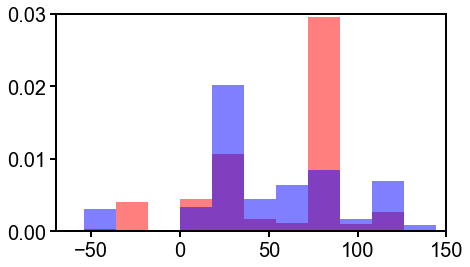

In [26]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble (ES only)
fig, ax = pl.subplots(1,figsize=(7,4))
binwidth = 20

ABG = pd.read_csv("data/ES1-synG34-Titration-ABG.csv", sep=",")
sas_indices = np.genfromtxt("data/ES1-G34syn-Titrations-pES_0p5-AllIndices.txt")
es_indices = sas_indices[sas_indices >= 5000]
A_ES = ABG.iloc[es_indices, 1]
A_GS = ABG.iloc[gs_indices, 1]


ax.hist(x=A_ES, range=[-180, 180], bins=20, color="red", alpha=0.5, density=True)
ax.hist(x=A_GS, range=[-180, 180], bins=20, color="blue", alpha=0.5, density=True)

#ax.set_xticklabels(np.arange(-180,181,60))
#ax.set_yticklabels(np.arange(-180,181,60))
ax.set_xlim(-70,150)
ax.set_ylim(0,0.03)


ax.tick_params(width=2,length=6)
plt.savefig("plots/Beta_ES_vs_GS_Hist1D.pdf")

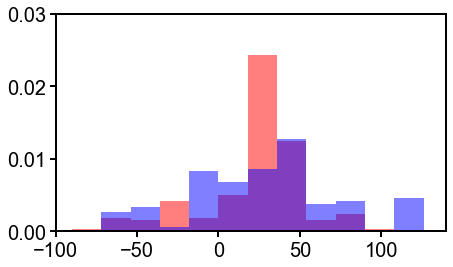

In [25]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble (ES only)
fig, ax = pl.subplots(1,figsize=(7,4))
binwidth = 20

ABG = pd.read_csv("data/ES1-synG34-Titration-ABG.csv", sep=",")
sas_indices = np.genfromtxt("data/ES1-G34syn-Titrations-pES_0p5-AllIndices.txt")
es_indices = sas_indices[sas_indices >= 5000]
A_ES = ABG.iloc[es_indices, 2]
A_GS = ABG.iloc[gs_indices, 2]


ax.hist(x=A_ES, range=[-180, 180], bins=20, color="red", alpha=0.5, density=True)
ax.hist(x=A_GS, range=[-180, 180], bins=20, color="blue", alpha=0.5, density=True)

#ax.set_xticklabels(np.arange(-180,181,60))
#ax.set_yticklabels(np.arange(-180,181,60))
ax.set_xlim(-100,140)
ax.set_ylim(0,0.03)


ax.tick_params(width=2,length=6)
plt.savefig("plots/Gamma_ES_vs_GS_Hist1D.pdf")

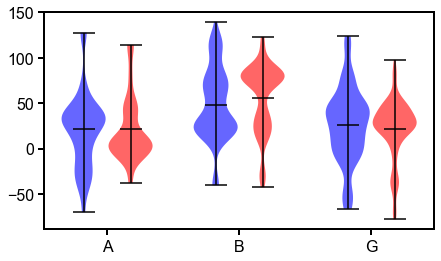

In [7]:
# Plot ABG 2D Histograms for FARFAR-Unbiased Ensemble (ES only)
import seaborn as sns
fig, ax = pl.subplots(1,figsize=(7,4))
binwidth = 20


ABG = pd.read_csv("data/ES1-synG34-Titration-ABG.csv", sep=",")
sas_indices = np.genfromtxt("data/ES1-G34syn-Titrations-pES_0p5-AllIndices.txt")
es_indices = sas_indices[sas_indices >= 5000]
gs_indices = sas_indices[sas_indices < 5000]
gs_indices = np.random.choice(gs_indices, size=n_es, replace=False)
n_es = es_indices.shape[0]
n_gs = gs_indices.shape[0]


A_ES = ABG.iloc[es_indices, 0]
A_GS = ABG.iloc[gs_indices, 0]
A_ES_mean = np.mean(A_ES)
A_ES_std = np.std(A_ES)
A_GS_mean = np.mean(A_GS)
A_GS_std = np.std(A_GS)

B_ES = ABG.iloc[es_indices, 1]
B_GS = ABG.iloc[gs_indices, 1]
B_ES_mean = np.mean(B_ES)
B_ES_std = np.std(B_ES)
B_GS_mean = np.mean(B_GS)
B_GS_std = np.std(B_GS)

G_ES = ABG.iloc[es_indices, 2]
G_GS = ABG.iloc[gs_indices, 2]
G_ES_mean = np.mean(G_ES)
G_ES_std = np.std(G_ES)
G_GS_mean = np.mean(G_GS)
G_GS_std = np.std(G_GS)

positions = [1.2+0.05, 1.8-0.05, 
             3.2+0.05-0.5 -0.2, 3.8-0.5-0.05-0.2,
             5.2-1+0.05-0.4, 5.8-1-0.05-0.4]

#plt.bar(positions, heights, yerr=errors, width=0.4, color=colors, alpha=0.8, 
        #capsize=6, error_kw = {'elinewidth':2, 'capthick':2}, edgecolor="black")
#plt.gca().axhline(y=0, color="k", ls="--", lw=2)
ax = plt.gca()

vp = ax.violinplot([A_GS, A_ES, B_GS, B_ES, G_GS, G_ES], positions = [1.1,1.9,3.1 + 0.25,3.9 + 0.25, 5.1+0.5,5.9+0.5], widths=0.75,
              showmeans=True)

colors = ['blue', 'red'] *3
counter = 0

vp['cmeans'].set_color('black')
vp['cmins'].set_color('black')
vp['cmaxes'].set_color('black')
vp['cbars'].set_color('black')


for pc in vp['bodies']:
    pc.set_facecolor(colors[counter])
    pc.set_alpha(0.6)
    counter += 1

xtick_labs = ["A", "B", "G"]
xtick_pos = [(1.2+1.8)/2, (3.2+3.8)/2+0.25, (5.2+5.8)/2+0.5 ]
ax.set_xticklabels(labels=xtick_labs, fontsize=16)
ax.set_xticks(ticks=xtick_pos)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(width=2,length=6)
plt.savefig("plots/ABG_ES_vs_GS.pdf")
plt.show()